# Clustering

## Read data from ‘Personal cost medical.csv’

In [29]:
#import library that need to use 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv('insurance.csv')

### Basic Exploration & Data Cleaning & Feature Engineering

In [31]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [32]:
#use for identification data type
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [33]:
#Finding missing values for each feature
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [34]:
#get numeric data
num_data = df.select_dtypes(include='number')
num_data.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [35]:
#get categorical data
cat_data = df.select_dtypes(include='object')
cat_data.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


#### Exploratory Data Analysis

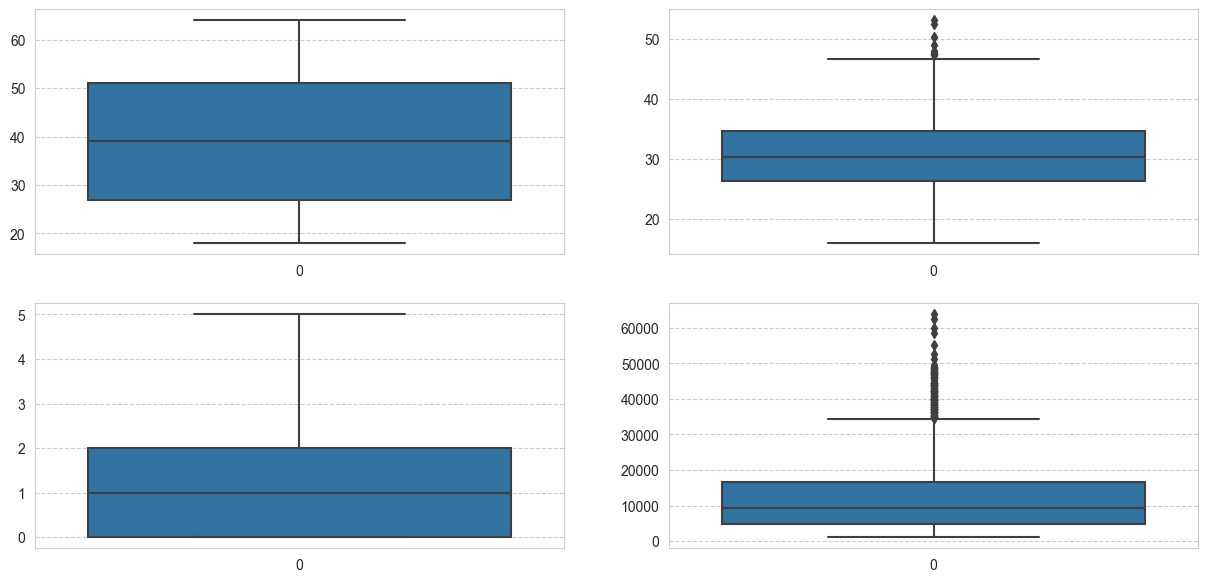

In [36]:
# Create count plots for all nominal features
fig, ax = plt.subplots(2, 2, figsize=(15, 7))
for i, subplot in zip(num_data.columns, ax.flatten()):
    sns.boxplot(num_data[i], ax=subplot)

Text(0.5, 1.0, 'Distribution of charges by age and smoker')

<Figure size 1200x1000 with 0 Axes>

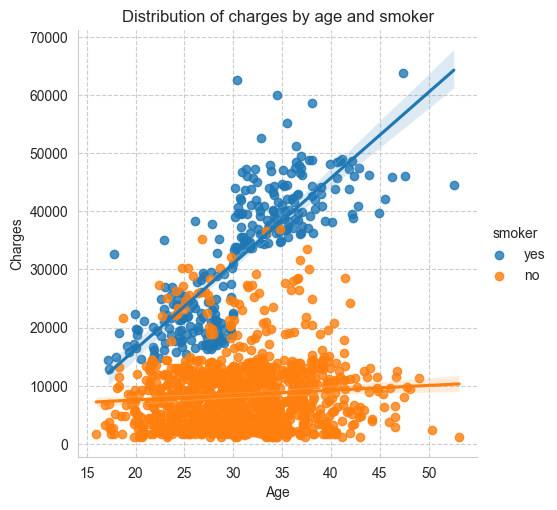

In [37]:
#The relationship between insurance claim amounts and age.
plt.figure(figsize = (12, 10))
sns.lmplot(x="bmi", y="charges", hue='smoker', data=df)
plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Distribution of charges by age and smoker")

Text(0.5, 1.0, 'Distribution of charges by bmi and sex')

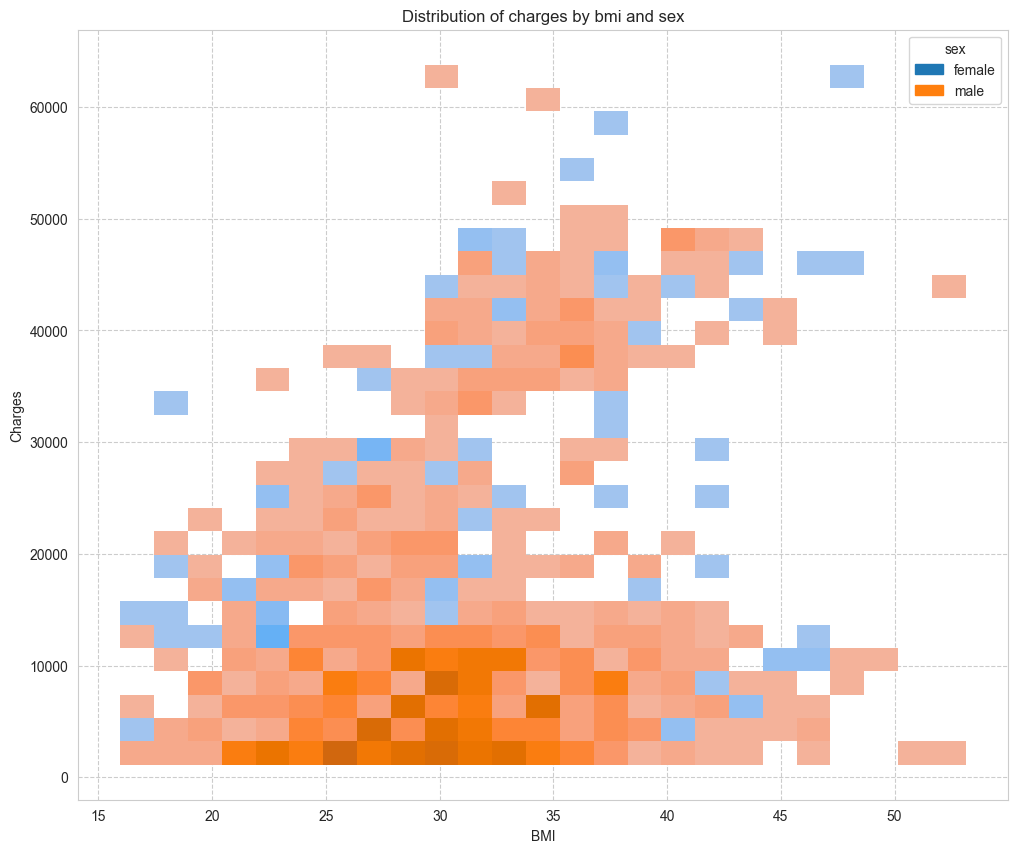

In [38]:
#The relationship between BMI and insurance claims.
sns.set_style("whitegrid", {'grid.linestyle': '--'})
plt.figure(figsize = (12, 10))
sns.histplot(x = "bmi", y = "charges", hue="sex", data = df)
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.title("Distribution of charges by bmi and sex")

Text(0.5, 1.0, 'Distribution of Charges by Age and Region')

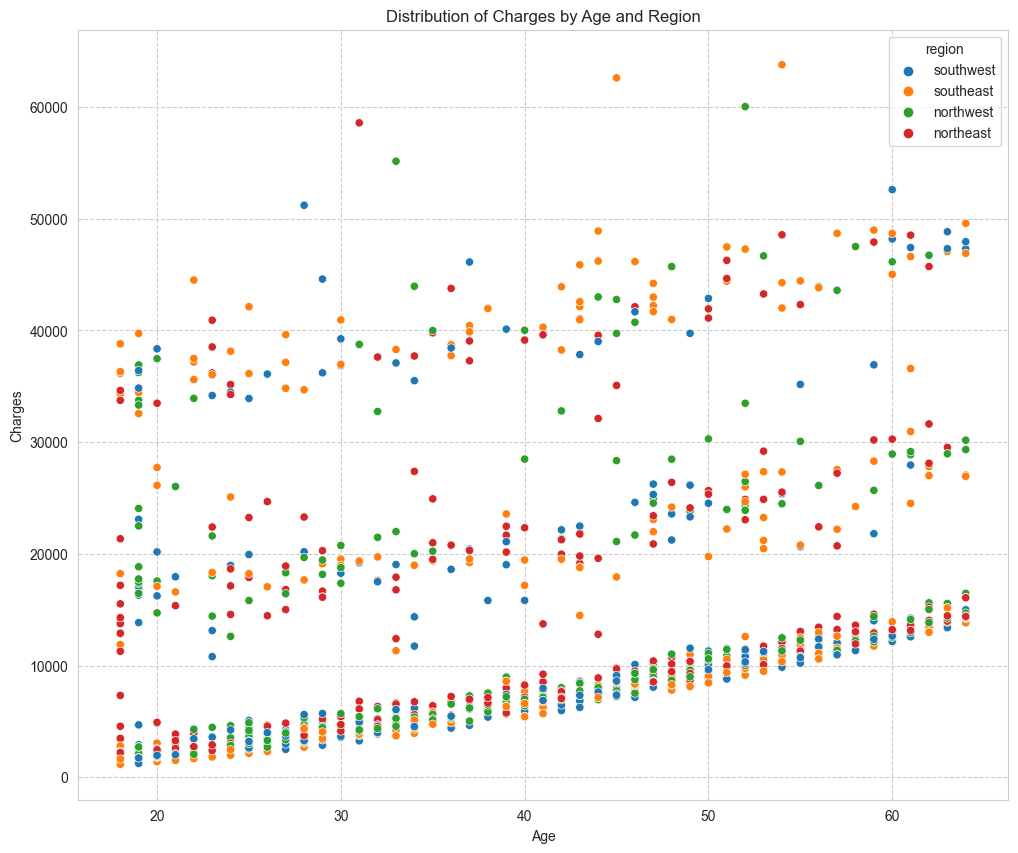

In [39]:
#The relationship between insurance claim amounts and age.
sns.set_style("whitegrid", {'grid.linestyle': '--'})
plt.figure(figsize = (12, 10))
sns.scatterplot(x = "age", y = "charges", hue="region",data = df)
plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Distribution of Charges by Age and Region")

<AxesSubplot:>

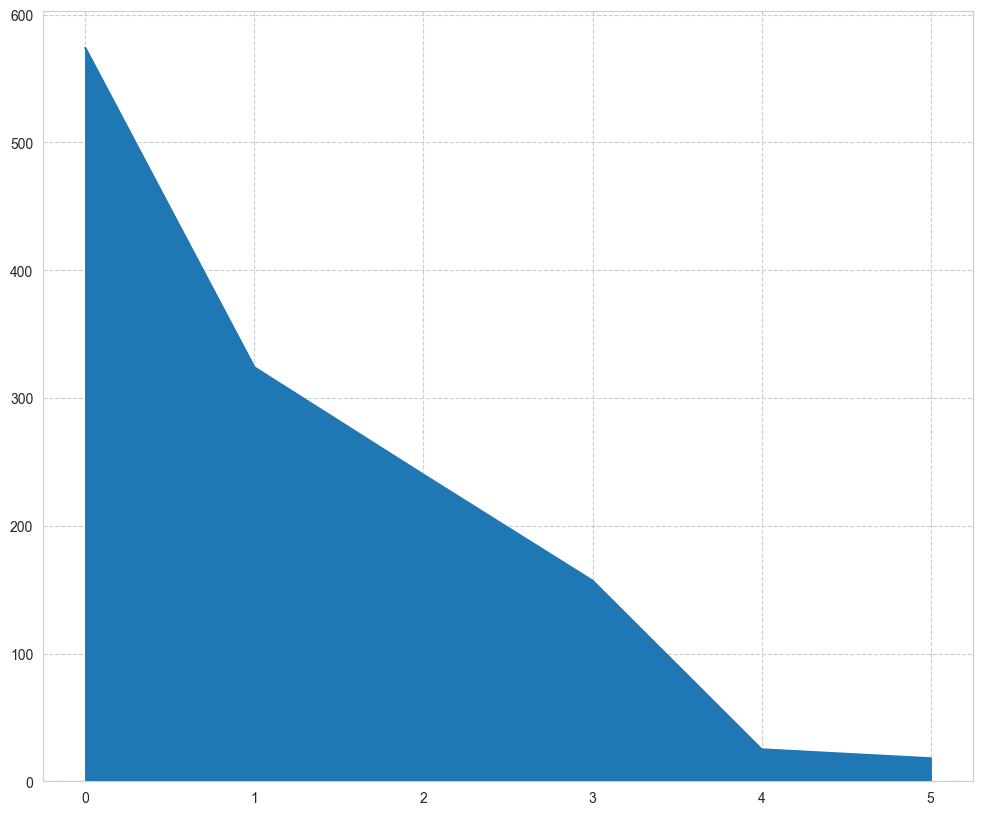

In [40]:
plt.figure(figsize=(12,10))
df['children'].value_counts().plot.area()

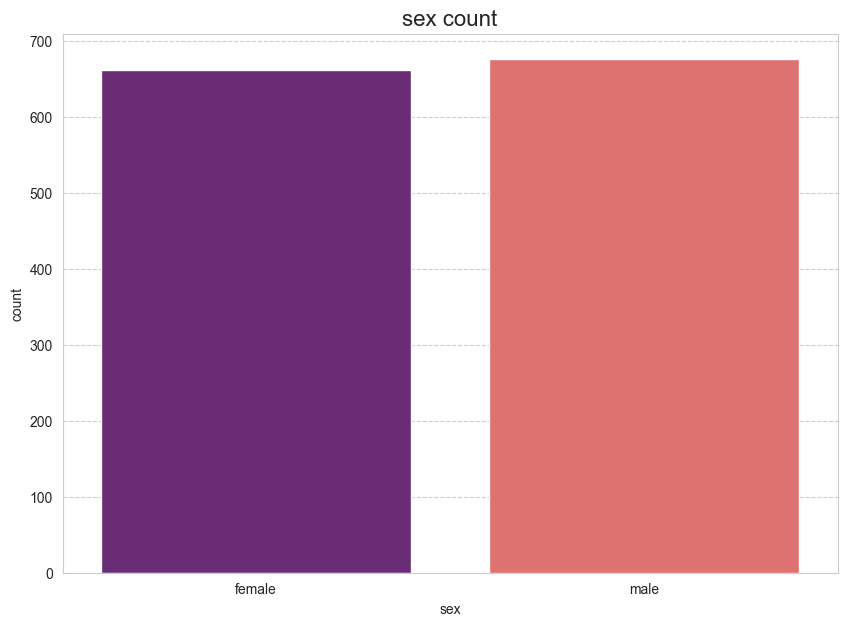

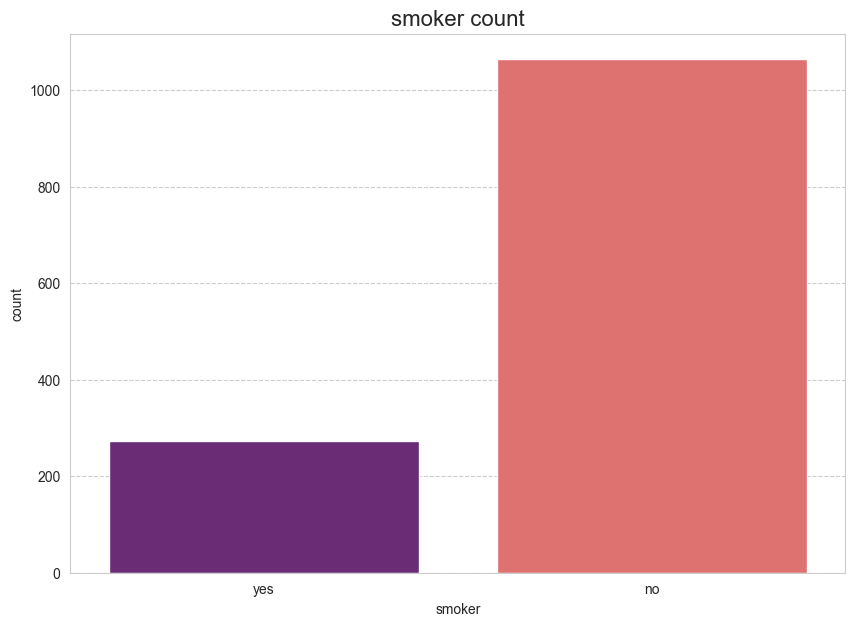

In [41]:
#boxplot for each feature
def boxplot(col_name):
    axes = plt.subplots(nrows=1, ncols=1, figsize = (10, 7))
    sns.countplot(ax = axes[1], x = col_name , data = df, palette = 'magma')
    axes[1].set_title((col_name + ' count'), fontsize = 16)
    plt.subplots_adjust(hspace = 0.5)

boxplot('sex')
boxplot('smoker')

<AxesSubplot:ylabel='region'>

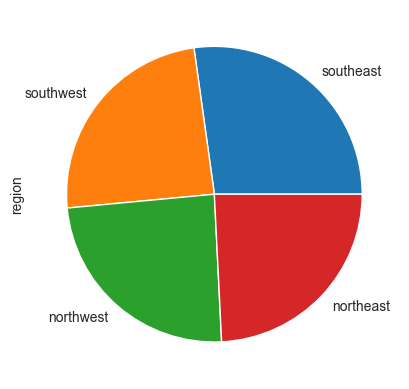

In [42]:
df['region'].value_counts().plot.pie()

In [43]:
# One-hot encoding for nominal features
cat_data = pd.get_dummies(cat_data)
cat_data

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1,0,0,1,0,0,0,1
1,0,1,1,0,0,0,1,0
2,0,1,1,0,0,0,1,0
3,0,1,1,0,0,1,0,0
4,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,0,1,1,0,0,1,0,0
1334,1,0,1,0,1,0,0,0
1335,1,0,1,0,0,0,1,0
1336,1,0,1,0,0,0,0,1


In [44]:
# Combine nominal and numeric features
df = pd.concat([num_data, cat_data], axis=1, sort=False)
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


#### Normalization

In [45]:
# Rescaling features into a range of [0,1]
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X = mms.fit_transform(df)
X = pd.DataFrame(X, columns=df.columns)
X.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0.021739,0.321227,0.0,0.251611,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.000000,0.479150,0.2,0.009636,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.217391,0.458434,0.6,0.053115,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.326087,0.181464,0.0,0.333010,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.304348,0.347592,0.0,0.043816,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


### Choosing an optimal number of cluster (k)

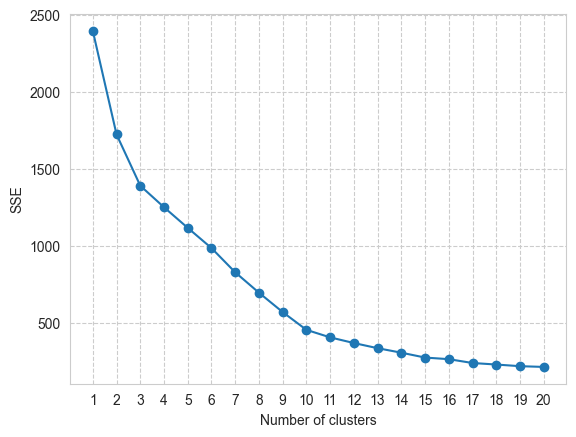

In [46]:
# Create a list to store the SSE values for each number of clusters
from sklearn.cluster import KMeans
sse = []

# Loop through a range of possible numbers of clusters
for k in range(1, 21):
    # Create a DBSCAN model with the current number of clusters
    kmeans = KMeans(n_clusters=k)
    
    # Fit the model to the data and predict the labels
    labels = kmeans.fit_predict(X)
    
    # Calculate the SSE for the current number of clusters
    sse.append(kmeans.inertia_)

# Plot the SSE values to determine the optimal number of clusters
plt.plot(range(1, 21), sse, '-o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.xticks(range(1, 21))
plt.show()

From the graph that k=10 is a good number of clusters, since it is a point where the SSE begins to decrease more slowly.

#### Choosing best model
Use Silhouette to compare several clustering model and then choose the best one to deploy.

In [47]:
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering, AgglomerativeClustering, OPTICS
from sklearn.metrics import silhouette_score

# Set the range of K values to try
ks = range(8, 16)

#Scores
score = silhouette_score(X, labels)

# Lists to store the results
kmeans_scores = []
dbscan_scores = []
spectral_scores = []
hierarchical_scores = []
optics_scores = []

# Loop over the values of K
for k in ks:
    # K-Means
    km = KMeans(n_clusters=k)
    km.fit(X)
    kmeans_scores.append(silhouette_score(X, km.labels_))
    print(f'K-Means (K={k}): {kmeans_scores[-1]}')

for k in ks:
    # Spectral Clustering
    sc = SpectralClustering(n_clusters=k)
    sc.fit(X)
    spectral_scores.append(silhouette_score(X, sc.labels_))
    print(f'Spectral Clustering (K={k}): {spectral_scores[-1]}')
    
for k in ks:
    # Hierarchical Clustering
    hc = AgglomerativeClustering(n_clusters=k)
    hc.fit(X)
    hierarchical_scores.append(silhouette_score(X, hc.labels_))
    print(f'Hierarchical Clustering (K={k}): {hierarchical_scores[-1]}')

    # DBSCAN
    dbscan = DBSCAN(eps=1, min_samples=10)
    dbscan.fit(X)
    dbscan_scores.append(silhouette_score(X, dbscan.labels_))

    # OPTICS
    op = OPTICS(min_samples=10)
    op.fit(X)
    optics_scores.append(silhouette_score(X, op.labels_))

print(f'DBSCAN : {dbscan_scores[-1]}')
print(f'OPTICS : {optics_scores[-1]}')

K-Means (K=8): 0.4559595881663761
K-Means (K=9): 0.5037584724123956
K-Means (K=10): 0.5410825582611969
K-Means (K=11): 0.5597658814333425
K-Means (K=12): 0.5764737772045947
K-Means (K=13): 0.5905101548177443
K-Means (K=14): 0.6059309821495116
K-Means (K=15): 0.6180234725562043
Spectral Clustering (K=8): 0.3810781305684182
Spectral Clustering (K=9): 0.4400351780744115
Spectral Clustering (K=10): 0.512812420332014
Spectral Clustering (K=11): 0.5597658814333425
Spectral Clustering (K=12): 0.56818556295965
Spectral Clustering (K=13): 0.5908929883540726
Spectral Clustering (K=14): 0.5484095722587263
Spectral Clustering (K=15): 0.6123342514462119
Hierarchical Clustering (K=8): 0.4314159205649176
Hierarchical Clustering (K=9): 0.48817982242231667
Hierarchical Clustering (K=10): 0.5410825582611969
Hierarchical Clustering (K=11): 0.5597658814333425
Hierarchical Clustering (K=12): 0.5764737772045947
Hierarchical Clustering (K=13): 0.5908377754341518
Hierarchical Clustering (K=14): 0.605930982149

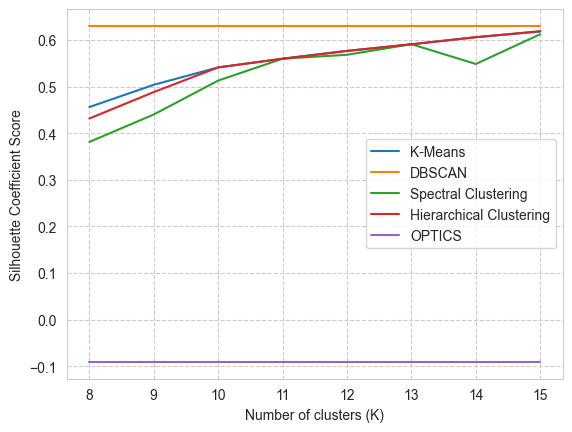

In [48]:
# Plot the results
plt.plot(ks, kmeans_scores, label='K-Means')
plt.plot(ks, dbscan_scores, label='DBSCAN')
plt.plot(ks, spectral_scores, label='Spectral Clustering')
plt.plot(ks, hierarchical_scores, label='Hierarchical Clustering')
plt.plot(ks, optics_scores, label='OPTICS')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Coefficient Score')
plt.legend()
plt.show()

### From above result, DBSCAN is the best algorithm to clustering model with dataset that we used. In regression, best model is Decision

#### Deploy DBSCAN

In [49]:
from sklearn.cluster import DBSCAN
db_scan = DBSCAN(eps=1, min_samples=10)
cluster = db_scan.fit_predict(X)
col_names = list(df.columns.values)

# append cluster labels to the last column of the dataset
result = pd.concat([pd.DataFrame(df,columns=col_names), pd.DataFrame(cluster,columns=['Cluster_Labels']) ], axis=1)

#cluster label starts from 0
result.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,Cluster_Labels
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1,0
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0,1
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0,1
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0,2
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0,2


#### Optimal SSE

In [50]:
silhouette = silhouette_score(X, cluster)
print("Silhouette Score: ", silhouette)

Silhouette Score:  0.6301055067547155


#### How many members for each clusters?

In [51]:
# Number of members in each cluster
result.Cluster_Labels.value_counts()

11    141
3     139
4     135
1     134
2     132
9     132
7     126
5     125
8      55
13     38
10     37
6      36
12     29
14     29
15     29
0      21
Name: Cluster_Labels, dtype: int64

Plot graph of result with numeric data

Text(0.5, 1.0, 'Distribution of charges by age and Cluster Labels')

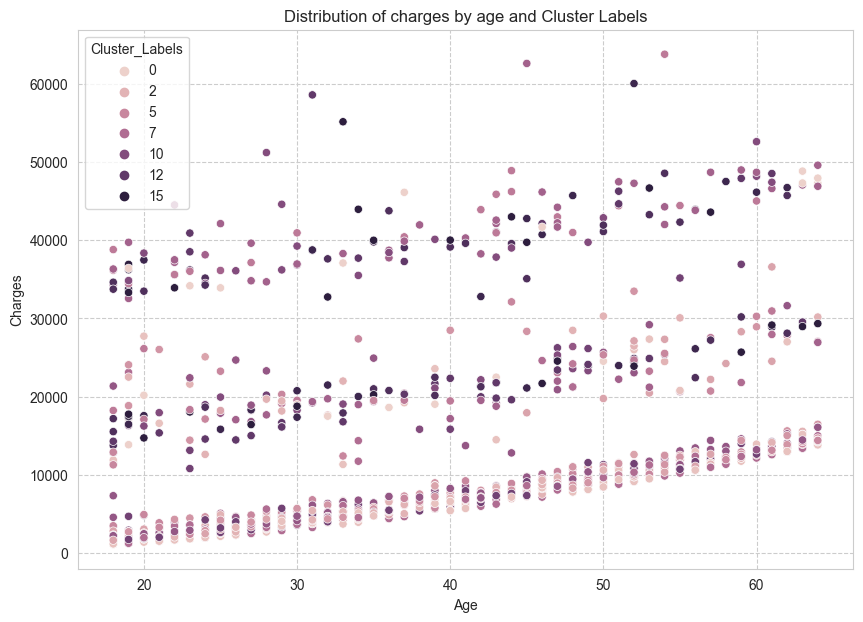

In [52]:
#The relationship between insurance claim amounts and age.
sns.set_style("whitegrid", {'grid.linestyle': '--'})
plt.figure(figsize = (10, 7))
sns.scatterplot(x = "age", y = "charges", hue="Cluster_Labels", data = result)
plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Distribution of charges by age and Cluster Labels")

Text(0.5, 1.0, 'Distribution of charges by BMI and Cluster Labels')

<Figure size 1000x700 with 0 Axes>

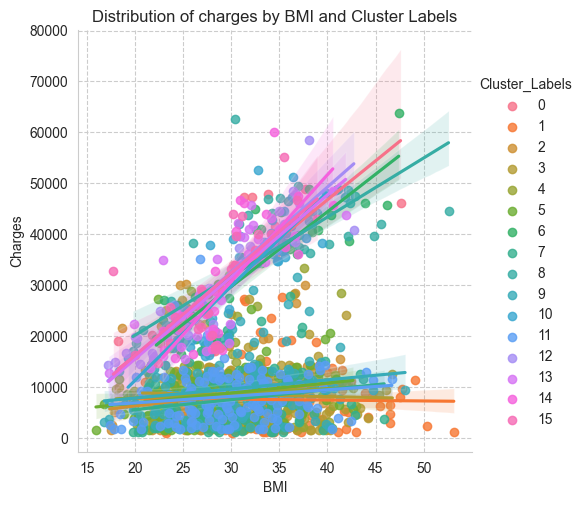

In [53]:
#The relationship between insurance claim amounts and age.
sns.set_style("whitegrid", {'grid.linestyle': '--'})
plt.figure(figsize = (10, 7))
sns.lmplot(x = "bmi", y = "charges", hue="Cluster_Labels", data = result)
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.title("Distribution of charges by BMI and Cluster Labels")

# Regression

### Split data to X and Y for Regression

In [54]:
X = result[['age', 'bmi', 'children','sex_female', 'sex_male', 'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest', 'region_southeast','region_southwest']]
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [55]:
Y = result[['charges']]
Y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [56]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

print("x_train: ", x_train.shape)
print("x_test: ", x_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

x_train:  (1070, 11)
x_test:  (268, 11)
y_train:  (1070, 1)
y_test:  (268, 1)


### Model Preparetion

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures

Linear = LinearRegression()
Dec = DecisionTreeRegressor()
Random = RandomForestRegressor()
MLP = MLPRegressor()
Lasso = linear_model.Lasso(alpha=0.1)

In [58]:
from sklearn.model_selection import cross_validate
cols = list(X.columns) 
mse = [] #array of mean_squared_error

# loop through each feature (column)
for i in cols: 
    LR = LinearRegression()
    cv_results = cross_validate(LR,X[[i]],Y, cv=10, scoring='neg_mean_squared_error')
    #LR.fit(x_train[[i]], y_train)
    #y_pred = LR.predict(x_test[[i]])
    mse.append(abs(cv_results['test_score']).mean())

In [59]:
# k-fold Cross Validation
# ===========================
#Step 1: Import the sklearn classes
from sklearn.model_selection import cross_validate

#Step 2: Fit and test the model with cross validation (10-fold)
cv_results = cross_validate(Linear,X,Y, cv=10, scoring='neg_mean_squared_error')

# Accuracy score for each fold 
#print('Tesing Accuracy for each fold:', cv_results['test_score'])

# Overall accuracy score for cross validaiton 
print('Cross Validation Mean Squared Error: %.3f +/- %.3f' % (abs(cv_results['test_score']).mean(), abs(cv_results['test_score']).std()))
mse.append(abs(cv_results['test_score']).mean())

Cross Validation Mean Squared Error: 36990225.367 +/- 5705749.334


In [60]:
# k-fold Cross Validation
# ===========================
#Step 1: Import the sklearn classes
from sklearn.model_selection import cross_validate

#step 2: Fit and test the model with cross validation (10-fold)
cv_results = cross_validate(Dec,X,Y, cv=10, scoring='neg_mean_squared_error')

# Accuracy score for each fold 
print('Cross Validation Mean Squared Error: %.3f +/- %.3f' % (abs(cv_results['test_score']).mean(), abs(cv_results['test_score']).std()))
mse.append(abs(cv_results['test_score']).mean())

Cross Validation Mean Squared Error: 43732286.558 +/- 7531204.102


In [61]:
# k-fold Cross Validation
# ===========================
#Step 1: Import the sklearn classes
from sklearn.model_selection import cross_validate

#step 2: Fit and test the model with cross validation (10-fold)
cv_results = cross_validate(Random,X,Y, cv=10, scoring='neg_mean_squared_error')

# Accuracy score for each fold 
print('Cross Validation Mean Squared Error: %.3f +/- %.3f' % (abs(cv_results['test_score']).mean(), abs(cv_results['test_score']).std()))
mse.append(abs(cv_results['test_score']).mean())

C:\Users\SIRIP\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\SIRIP\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\SIRIP\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\SIRIP\AppData\Roaming\Python\Python310\site-packages\sklearn\mod

Cross Validation Mean Squared Error: 23605954.552 +/- 5051531.480


In [62]:
# k-fold Cross Validation
# ===========================
#Step 1: Import the sklearn classes
from sklearn.model_selection import cross_validate

#step 2: Fit and test the model with cross validation (10-fold)
cv_results = cross_validate(MLP,X,Y, cv=10, scoring='neg_mean_squared_error')

# Accuracy score for each fold 
print('Cross Validation Mean Squared Error: %.3f +/- %.3f' % (abs(cv_results['test_score']).mean(), abs(cv_results['test_score']).std()))
mse.append(abs(cv_results['test_score']).mean())

C:\Users\SIRIP\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SIRIP\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\SIRIP\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SIRIP\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: S

Cross Validation Mean Squared Error: 137833595.177 +/- 18322766.924


C:\Users\SIRIP\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [63]:
# k-fold Cross Validation
# ===========================
#Step 1: Import the sklearn classes
from sklearn.model_selection import cross_validate

#step 2: Fit and test the model with cross validation (10-fold)
cv_results = cross_validate(Lasso,X,Y, cv=10, scoring='neg_mean_squared_error')

# Accuracy score for each fold 
print('Cross Validation Mean Squared Error: %.3f +/- %.3f' % (abs(cv_results['test_score']).mean(), abs(cv_results['test_score']).std()))
mse.append(abs(cv_results['test_score']).mean())

Cross Validation Mean Squared Error: 36990091.346 +/- 5705388.457


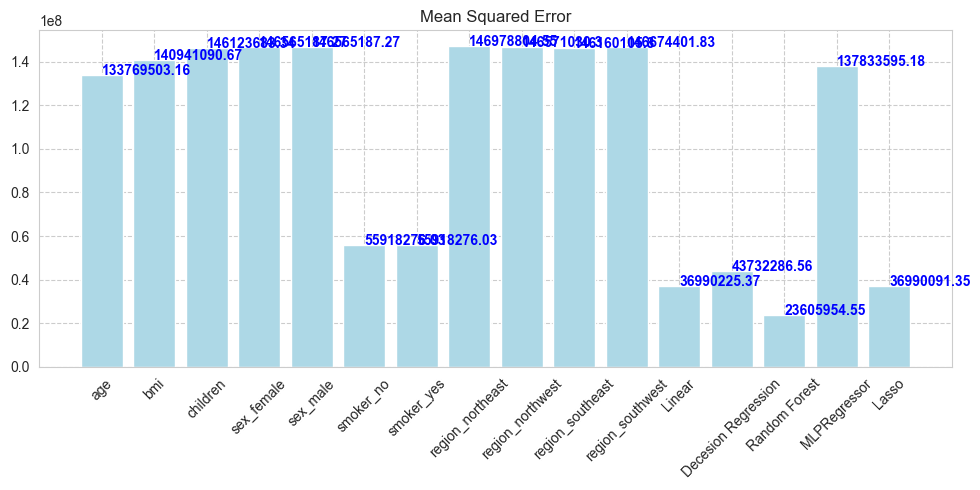

In [64]:
# Created a plot that compare mean_squared_error of each feature
f, ax = plt.subplots(figsize=(10,5))
plt.title('Mean Squared Error')
no_of_features = len(mse)
xlabels = list(X.columns) + ['Linear', 'Decesion Regression' , 'Random Forest', 'MLPRegressor', 'Lasso']
plt.bar(range(no_of_features), mse, color='lightblue', align='center')
plt.xticks(range(no_of_features), xlabels, rotation=45)

# set individual bar lables with accuracy value
for i, v in enumerate(mse):
    plt.text(i, v, str(round(v,2)), color='blue', fontweight='bold')

plt.tight_layout()
plt.show()